In [1]:
# Step 1: Load and Prepare the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# Additional import for K-Medoids 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Basic Exploration
print("Feature names:\n", wine.feature_names)
print("\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

# 3. Standardize using z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nOriginal Data Mean:", np.mean(X, axis=0)[:5])
print("Scaled Data Mean (first 5):", np.mean(X_scaled, axis=0)[:5])
print("Scaled Data Std Dev (first 5):", np.std(X_scaled, axis=0)[:5])


Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
{0: 59, 1: 71, 2: 48}

Original Data Mean: [13.00061798  2.33634831  2.36651685 19.49494382 99.74157303]
Scaled Data Mean (first 5): [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17]
Scaled Data Std Dev (first 5): [1. 1. 1. 1. 1.]


In [2]:
# Step 2: Implement K-Means Clustering

# Initialize KMeans with k=3 (because there are 3 wine classes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Compute evaluation metrics
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

print("K-Means Results:")
print("----------------")
print("Silhouette Score:", round(silhouette_kmeans, 4))
print("Adjusted Rand Index:", round(ari_kmeans, 4))


/Users/shusamkhatri/Desktop/University of Cumberlands/Big Data and Data Mining/Week 3/Lab 3/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Results:
----------------
Silhouette Score: 0.2849
Adjusted Rand Index: 0.8975


In [3]:
# Step 3: Implement K-Medoids Clustering

kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Compute metrics
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
ari_kmedoids = adjusted_rand_score(y, kmedoids_labels)

print("\nK-Medoids Results:")
print("------------------")
print("Silhouette Score:", round(silhouette_kmedoids, 4))
print("Adjusted Rand Index:", round(ari_kmedoids, 4))



K-Medoids Results:
------------------
Silhouette Score: 0.2676
Adjusted Rand Index: 0.7411


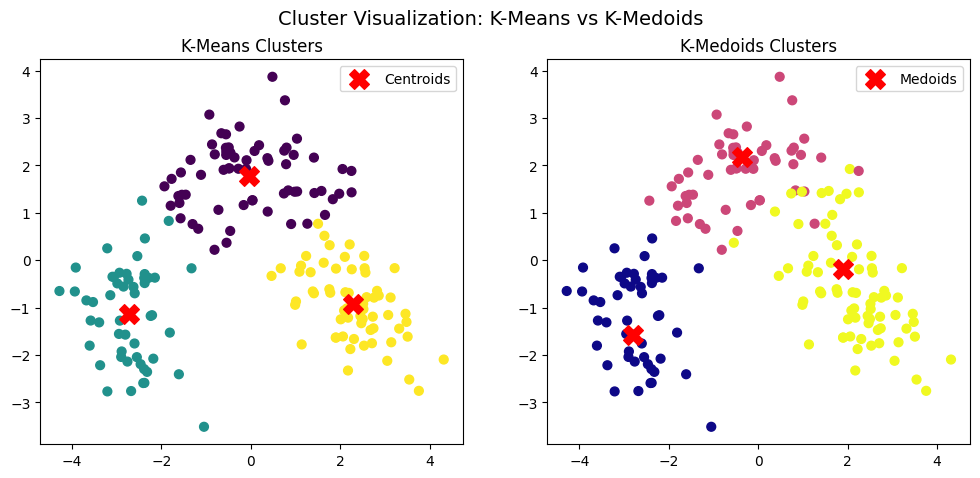

In [4]:
# Step 4: Visualize and Compare Results using PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot K-Means clusters
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=40)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
                pca.transform(kmeans.cluster_centers_)[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[0].set_title('K-Means Clusters')
axes[0].legend()

# Plot K-Medoids clusters
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='plasma', s=40)
axes[1].scatter(X_pca[kmedoids.medoid_indices_, 0],
                X_pca[kmedoids.medoid_indices_, 1],
                c='red', marker='X', s=200, label='Medoids')
axes[1].set_title('K-Medoids Clusters')
axes[1].legend()

plt.suptitle("Cluster Visualization: K-Means vs K-Medoids", fontsize=14)
plt.show()
